## Index
* [Instalar librerías](#install-libraries)
    * [Non-blind deconvolution](#non-blind-deconvolution)
        * [Wiener Filter](#wiener)
        * [Lucy-Richardson](#Lucy-Richardson)
        * [Modified unsupervised Wiener](#uns-wiener)
        * [Lucy-Richardson with TV prior](#Lucy-Richardson-TV)
    * [Blind deconvolution](#bind-deconvolution)
    * [Semi-blind deconvolution](#semi-bind-deconvolution)

# Instalar librerías <a class="anchor" id="install-libraries"></a>

Primero activar el entorno virtual e instalar el siguiente paquete si se usa VSCode:
```bash
python3 -m pip install ipykernel -U --force-reinstall
```

**Instalar [numpy](https://numpy.org/install/):**
```bash
pip install numpy matplotlib scipy scikit-image

In [2]:
# Librerías requeridas
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import deconvolve
from skimage import color, data, restoration, img_as_float, io

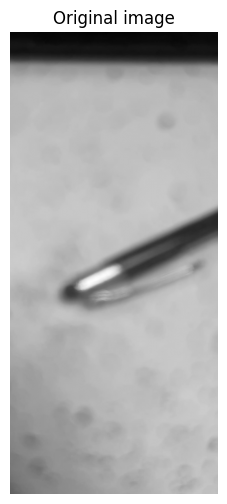

In [43]:
# Imagen degradada
image = io.imread("../../assets/7.jpg")

if image.ndim == 3:
    image = color.rgb2gray(image)

image = img_as_float(image)

plt.figure(figsize=(6, 6))
plt.title("Original image")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

# Non-blind deconvolution 

[[1.02047542e-07 2.60920122e-07 6.14836986e-07 1.33524139e-06
  2.67243394e-06 4.92948512e-06 8.37999057e-06 1.31290375e-05
  1.89570012e-05 2.52263127e-05 3.09375061e-05 3.49674706e-05
  3.64242421e-05 3.49674706e-05 3.09375061e-05 2.52263127e-05
  1.89570012e-05 1.31290375e-05 8.37999057e-06 4.92948512e-06
  2.67243394e-06 1.33524139e-06 6.14836986e-07 2.60920122e-07
  1.02047542e-07]
 [2.60920122e-07 6.67133265e-07 1.57204513e-06 3.41401018e-06
  6.83300916e-06 1.26039474e-05 2.14263677e-05 3.35689620e-05
  4.84701832e-05 6.44998640e-05 7.91025212e-05 8.94065305e-05
  9.31312747e-05 8.94065305e-05 7.91025212e-05 6.44998640e-05
  4.84701832e-05 3.35689620e-05 2.14263677e-05 1.26039474e-05
  6.83300916e-06 3.41401018e-06 1.57204513e-06 6.67133265e-07
  2.60920122e-07]
 [6.14836986e-07 1.57204513e-06 3.70439613e-06 8.04483654e-06
  1.61014288e-05 2.97001742e-05 5.04894880e-05 7.91025212e-05
  1.14216034e-04 1.51988669e-04 1.86398640e-04 2.10679197e-04
  2.19456253e-04 2.10679197e-04 1.

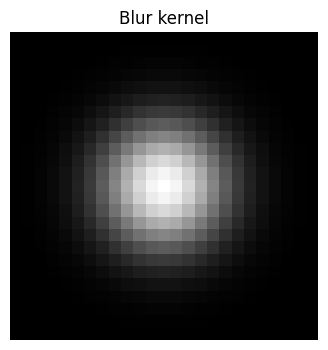

In [44]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / kernel.sum()

kernel = gaussian_kernel(size=25, sigma=3.5)
print(kernel)
plt.figure(figsize=(4, 4))
plt.title("Blur kernel")
plt.imshow(kernel, cmap="gray")
plt.axis("off")
plt.show()

## Wiener Filter 

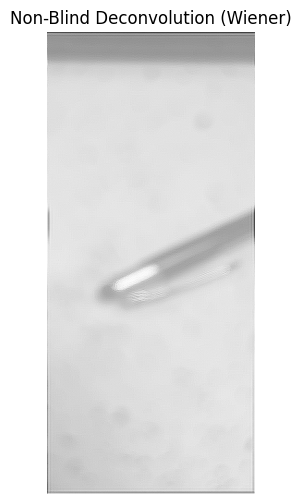

In [37]:
#...

## Modified unsupervised Wiener 

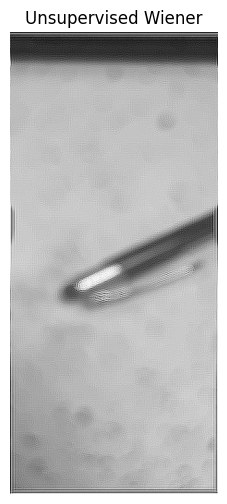

In [45]:
deconvolved_wiener = restoration.unsupervised_wiener(image, kernel)[0]
deconvolved_wiener = np.clip(deconvolved_wiener, 0, np.max(deconvolved_wiener))  
deconvolved_wiener = np.uint8(255 * (deconvolved_wiener - np.min(deconvolved_wiener)) / (np.max(deconvolved_wiener) - np.min(deconvolved_wiener)))

plt.figure(figsize=(6, 6))
plt.title("Unsupervised Wiener")
plt.imshow(deconvolved_wiener, cmap="gray")
plt.axis("off")
plt.show()

## Lucy-Richardson

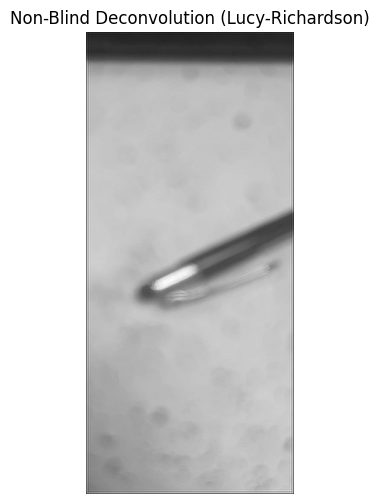

In [38]:
deconvolved_lr = restoration.richardson_lucy(image, kernel, num_iter=30)

plt.figure(figsize=(6, 6))
plt.title("Non-Blind Deconvolution (Lucy-Richardson)")
plt.imshow(deconvolved_lr, cmap="gray")
plt.axis("off")
plt.show()

## Lucy-Richardson with TV prior

# Blind deconvolution

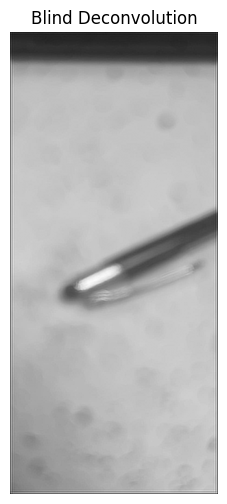

In [46]:
#